In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
font = fm.FontProperties(fname='../input/staatfont/Staatliches-Regular.ttf')
data = pd.read_csv("football_players.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           54 non-null     int64  
 1   Origin         54 non-null     object 
 2   Player         54 non-null     object 
 3   From(Country)  54 non-null     object 
 4   From(Club)     54 non-null     object 
 5   To(Country)    54 non-null     object 
 6   To(Club)       54 non-null     object 
 7   Position       54 non-null     object 
 8   Fee(€ mln)     54 non-null     float64
 9   Fee(£ mln)     54 non-null     object 
 10  Year           54 non-null     int64  
 11  Born           54 non-null     int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 5.2+ KB


In [4]:
data.head()

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992
1,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.0,£163,2018,1998
2,3,Brazil,Philippe Coutinho,England,Liverpool,Spain,Barcelona,Midfielder,145.0,£105,2018,1992
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,£107,2019,1991


In [5]:
data.tail()

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
49,50,Morocco,Achraf Hakimi,Italy,Internazionale,France,Paris Saint-Germain,Defender,60.0,£51.3,2021,1998
50,51,Guinea,Naby Keïta,Germany,RB Leipzig,England,Liverpool,Midfielder,60.0,£52.75,2018,1995
51,52,France,Tanguy Ndombele,France,Lyon,England,Tottenham Hotspur,Midfielder,60.0,£53.8,2019,1996
52,53,Colombia,Radamel Falcao,Spain,Atlético Madrid,France,Monaco,Striker,60.0,£51,2013,1986
53,54,Bosnia and Herzegovina,Miralem Pjanić,Italy,Juventus,Spain,Barcelona,Midfielder,60.0,£54.8,2020,1990


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,54.0,27.444444,15.716434,1.0,14.250,27.5,40.75,54.0
Fee(€ mln),54.0,83.159259,30.174258,60.0,64.625,75.0,86.50,222.0
Year,54.0,2016.629630,4.296977,2000.0,2015.250,2018.0,2019.00,2021.0
Born,54.0,1991.888889,5.932535,1972.0,1989.250,1993.0,1996.00,2000.0


In [7]:
data.columns

Index(['Rank', 'Origin', 'Player', 'From(Country)', 'From(Club)',
       'To(Country)', 'To(Club)', 'Position', 'Fee(€ mln)', 'Fee(£ mln)',
       'Year', 'Born'],
      dtype='object')

In [8]:
data.isna().sum()

Rank             0
Origin           0
Player           0
From(Country)    0
From(Club)       0
To(Country)      0
To(Club)         0
Position         0
Fee(€ mln)       0
Fee(£ mln)       0
Year             0
Born             0
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data1=data.groupby('From(Club)', as_index=False,sort=True)['Fee(€ mln)'].sum()
data1=data1.sort_values('Fee(€ mln)', ascending=False)
data1.head()

,From(Club),Fee(€ mln)
4,Barcelona,356.0
3,Atlético Madrid,330.0
19,Monaco,325.0
7,Borussia Dortmund,317.7
12,Juventus,306.0


Text(0.5, 1.0, '10 clubs with the highest transfer revenues')

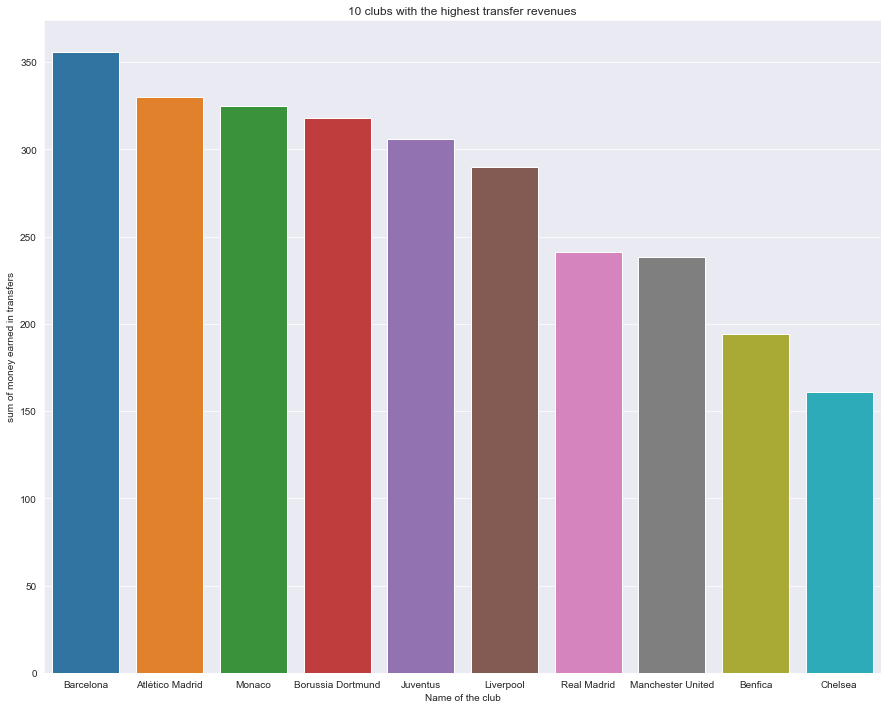

In [13]:
data1 = data1[0:10]
plt.figure(figsize=(15,12))
sns.set_style('darkgrid')
p = sns.barplot(x='From(Club)',y='Fee(€ mln)',data=data1)
p.set( xlabel = "Name of the club", ylabel = "sum of money earned in transfers")
p.set_title("10 clubs with the highest transfer revenues")

In [12]:
data3 = data.groupby('Origin', as_index=False,sort=True)['Fee(€ mln)'].sum()
data3 = data3.sort_values('Fee(€ mln)', ascending=False)
data.head()

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992
1,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.0,£163,2018,1998
2,3,Brazil,Philippe Coutinho,England,Liverpool,Spain,Barcelona,Midfielder,145.0,£105,2018,1992
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,£107,2019,1991


Text(0.5, 1.0, 'top 5 countries where the most expensive players come from')

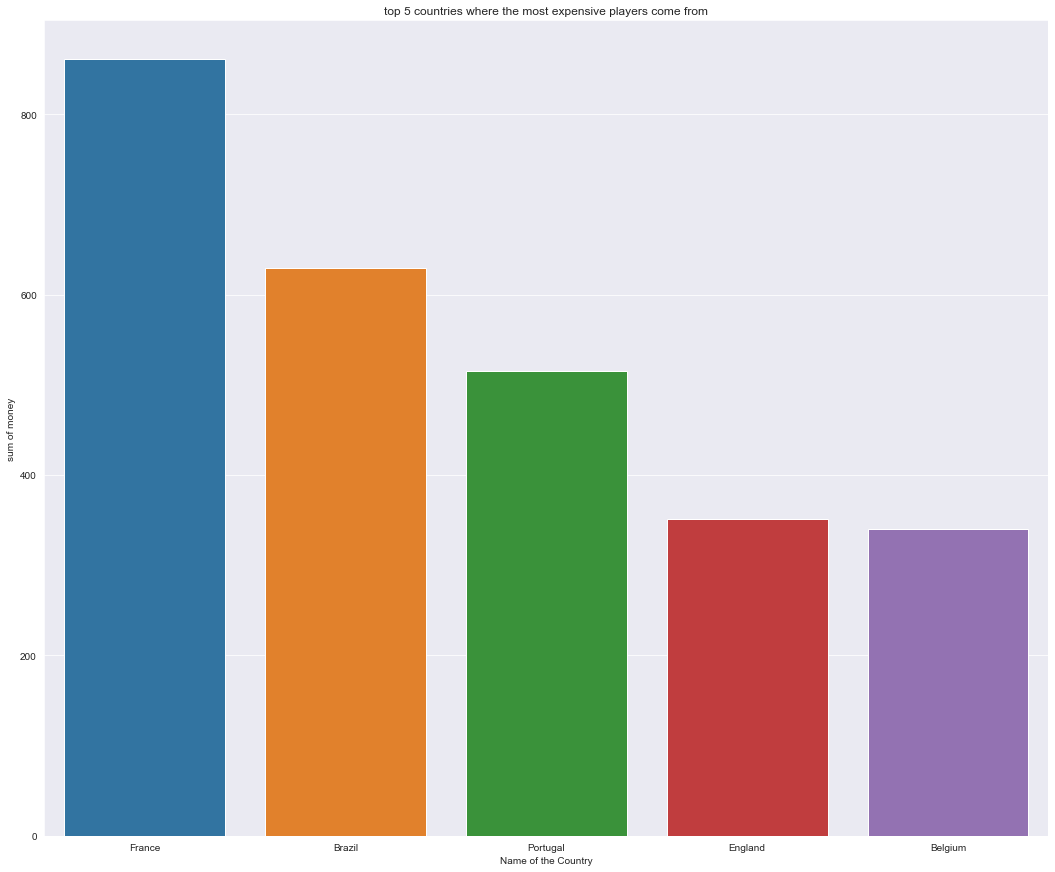

In [12]:
data3 = data3[0:5]
plt.figure(figsize=(18,15))
sns.set_style('darkgrid')
p = sns.barplot(x='Origin',y='Fee(€ mln)',data=data3)
p.set( xlabel = "Name of the Country", ylabel = "sum of money")
p.set_title("top 5 countries where the most expensive players come from")

In [13]:
data4 = data.groupby('Position', as_index=False,sort=True)['Fee(€ mln)'].sum()
data4 = data4.sort_values('Fee(€ mln)', ascending=False)
data4.head()

,Position,Fee(€ mln)
3,Midfielder,1551.6
1,Forward,1491.3
4,Striker,720.5
0,Defender,584.7
2,Goalkeeper,142.5


In [14]:
data5 = data['Position'].value_counts()
data5 = pd.DataFrame(data5)
data5.columns =[ 'Count']
data5

,Count
Midfielder,20
Forward,14
Striker,10
Defender,8
Goalkeeper,2


In [15]:
data4['Count'] = data5['Count'].values
data4['Average_price'] = data4['Fee(€ mln)']/data4['Count']
data4

,Position,Fee(€ mln),Count,Average_price
3,Midfielder,1551.6,20,77.580000
1,Forward,1491.3,14,106.521429
4,Striker,720.5,10,72.050000
0,Defender,584.7,8,73.087500
2,Goalkeeper,142.5,2,71.250000


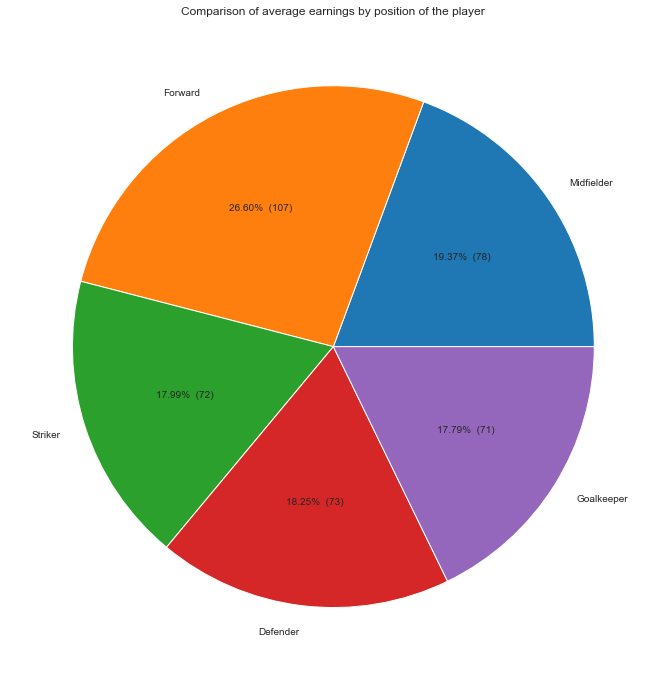

In [18]:
import matplotlib.pyplot as plt
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
mlabels=['Midfielder','Forward','Striker','Defender','Goalkeeper']
plt.pie(data4['Average_price'],labels=mlabels,autopct=make_autopct(data4['Average_price']))
plt.title('Comparison of average earnings by position of the player')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()